In [1]:
#base_path = 'c:/Users/tpiechowiak/OneDrive - GN Store Nord/GNOS data/'
#setting system path
import sys
sys.path.append('/home/tobias/data/')
base_path = '/home/tobias/data/'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import pickle

In [3]:
with open(base_path + "All_columns_resampled_weekly.pkl", "rb") as input_file:
        weekly_rsmp = pickle.load(input_file)
print("Read weekly resampled parameters from pickle file")

Read weekly resampled parameters from pickle file


In [4]:
weekly_rsmp.keys()

Index(['ADLProperties_TotalUseTime', 'ADLProperties_UseTimeInPhoneStreaming',
       'ADLProperties_TotalUseTimeInCharger',
       'ADLProperties_Bass3StateHistogram_0',
       'ADLProperties_Bass3StateHistogram_1',
       'ADLProperties_Bass3StateHistogram_2',
       'ADLProperties_Bass3StateHistogram_3',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_0',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_1',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_2',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_3',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_4',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_5',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_6',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_1_0',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_1_1',
       'ADLProperties_HistogramOnClassifiedEnvironmentPerPrese

In [5]:
#loop over the hi's and collect mean use time for each environment

def get_use_time_env(df):
    
    import pandas as pd

    tmp = {}
    env_usetime_mean = {}
    env0 = []
    env1 = []
    env2 = []
    env3 = []
    env4 = []
    env5 = []
    env6 = []
    
    env_df = []
    
    his = []

    cnt = 0
    for hi_id, group in df.groupby('ADLRawData_HearingInstrumentId'):
        if (cnt%1000 == 0):
            print('HI = ',cnt)
            
        for idx in range(0,7): #7 environments
            tmp[idx] = (group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_2_'+str(idx)] + \
            group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_1_'+ str(idx)] + \
            group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_0_'+ str(idx)] + \
            group['ADLProperties_HistogramOnClassifiedEnvironmentPerPreset_3_'+ str(idx)]) #/  group['ADLProperties_TotalUseTime'] * 100
            env_usetime_mean[idx] = tmp[idx].loc['2019-01-01':'2020-01-01'].sum() / 52            
        
        #test below 0
        if(env_usetime_mean[0] < 0):
            continue
        
        if(env_usetime_mean[1] < 0):
            continue
            
        if(env_usetime_mean[2] < 0):
            continue
            
        if(env_usetime_mean[3] < 0):
            continue            
            
        if(env_usetime_mean[4] < 0):
            continue
            
        if(env_usetime_mean[5] < 0):
            continue
            
        if(env_usetime_mean[6] < 0):            
            continue            

        summe = sum((env_usetime_mean[i] for i in range(7)))

        if(summe == 0):
            continue
            
        #test above 100
        if(env_usetime_mean[0] > 100):    
            continue
        
        if(env_usetime_mean[1] > 100):
            continue
        
        if(env_usetime_mean[2] > 100):
            continue
    
        if(env_usetime_mean[3] > 100):
            continue
            
        if(env_usetime_mean[4] > 100):
            continue
            
        if(env_usetime_mean[5] > 100):
            continue
    
        if(env_usetime_mean[6] > 100):
            continue            
    
        env0.append(env_usetime_mean[0] / summe * 100) #(env_usetime_mean[0] + env_usetime_mean[1] + env_usetime_mean[2] + env_usetime_mean[3] + env_usetime_mean[4] + \
             #env_usetime_mean[5] + env_usetime_mean[6]) * 100)
        env1.append(env_usetime_mean[1] / summe * 100) #/ (env_usetime_mean[0] + env_usetime_mean[1] + env_usetime_mean[2] + env_usetime_mean[3] + env_usetime_mean[4] + \
             #env_usetime_mean[5] + env_usetime_mean[6]) * 100)
        env2.append(env_usetime_mean[2] / summe * 100) #(env_usetime_mean[0] + env_usetime_mean[1] + env_usetime_mean[2] + env_usetime_mean[3] + env_usetime_mean[4] + \
             #env_usetime_mean[5] + env_usetime_mean[6]) * 100)
        env3.append(env_usetime_mean[3] / summe * 100) #(env_usetime_mean[0] + env_usetime_mean[1] + env_usetime_mean[2] + env_usetime_mean[3] + env_usetime_mean[4] + \
             #env_usetime_mean[5] + env_usetime_mean[6]) * 100)
        env4.append(env_usetime_mean[4] / summe * 100) #(env_usetime_mean[0] + env_usetime_mean[1] + env_usetime_mean[2] + env_usetime_mean[3] + env_usetime_mean[4] + \
             #env_usetime_mean[5] + env_usetime_mean[6]) * 100)
        env5.append(env_usetime_mean[5] / summe * 100) #(env_usetime_mean[0] + env_usetime_mean[1] + env_usetime_mean[2] + env_usetime_mean[3] + env_usetime_mean[4] + \
             #env_usetime_mean[5] + env_usetime_mean[6]) * 100)
        env6.append(env_usetime_mean[6] / summe * 100) #(env_usetime_mean[0] + env_usetime_mean[1] + env_usetime_mean[2] + env_usetime_mean[3] + env_usetime_mean[4] + \
             #env_usetime_mean[5] + env_usetime_mean[6]) * 100)    
        cnt += 1           

        his.append(hi_id)
        
    env_df = pd.DataFrame({'HI_ID':his, 'env0':env0, 'env1':env1, 'env2':env2, 'env3':env3, 'env4':env4,\
                           'env5':env5, 'env6':env6})    
    return (env0, env1, env2, env3 ,env4, env5, env6, env_df)
    

In [6]:
#loading the low-usage cluster hi ids 
with open(base_path + "hi_id_low_cluster.pkl", "rb") as input_file:
        low_cluster_id = pickle.load(input_file)
print("Read low usage cluster ids")


Read low usage cluster ids


In [7]:
weekly_rsmp['ADLRawData_HearingInstrumentId']

ADLRawData_CreationTime
2019-01-27 00:00:00+00:00    000087591652BB78FFE65162CD5E6AD65AC8C2641B24BD...
2019-02-03 00:00:00+00:00    000087591652BB78FFE65162CD5E6AD65AC8C2641B24BD...
2019-02-10 00:00:00+00:00    000087591652BB78FFE65162CD5E6AD65AC8C2641B24BD...
2019-02-17 00:00:00+00:00    000087591652BB78FFE65162CD5E6AD65AC8C2641B24BD...
2019-02-24 00:00:00+00:00    000087591652BB78FFE65162CD5E6AD65AC8C2641B24BD...
                                                   ...                        
2020-02-02 00:00:00+00:00    FFFE6C07037D6D69653D815C49D8A6F009C2947CC4F1DF...
2020-02-09 00:00:00+00:00    FFFE6C07037D6D69653D815C49D8A6F009C2947CC4F1DF...
2020-02-16 00:00:00+00:00    FFFE6C07037D6D69653D815C49D8A6F009C2947CC4F1DF...
2020-02-23 00:00:00+00:00    FFFE6C07037D6D69653D815C49D8A6F009C2947CC4F1DF...
2020-03-01 00:00:00+00:00    FFFE6C07037D6D69653D815C49D8A6F009C2947CC4F1DF...
Name: ADLRawData_HearingInstrumentId, Length: 3287096, dtype: object

In [8]:
#now choose those from low usage cluster and others
low_usage_cluster = weekly_rsmp[weekly_rsmp['ADLRawData_HearingInstrumentId'].isin(low_cluster_id)]
all_other = weekly_rsmp[~weekly_rsmp['ADLRawData_HearingInstrumentId'].isin(low_cluster_id)]

In [9]:
low_usage_cluster.shape

(148496, 51)

In [10]:
#now calculate historgrams
(env0_0, env1_0, env2_0, env3_0, env4_0, env5_0, env6_0, env_df_0) = get_use_time_env(low_usage_cluster)
(env0_1, env1_1, env2_1, env3_1, env4_1, env5_1, env6_1, env_df_1) = get_use_time_env(all_other)



HI =  0
HI =  1000
HI =  0
HI =  1000
HI =  2000
HI =  3000
HI =  4000
HI =  5000
HI =  6000
HI =  7000
HI =  8000
HI =  9000
HI =  10000
HI =  11000
HI =  12000
HI =  13000
HI =  14000
HI =  15000
HI =  16000
HI =  17000
HI =  18000
HI =  19000
HI =  20000
HI =  21000
HI =  22000
HI =  23000
HI =  24000
HI =  25000
HI =  26000
HI =  27000
HI =  28000
HI =  29000
HI =  30000
HI =  31000
HI =  32000
HI =  33000
HI =  34000
HI =  35000
HI =  35000
HI =  36000
HI =  36000
HI =  37000
HI =  38000


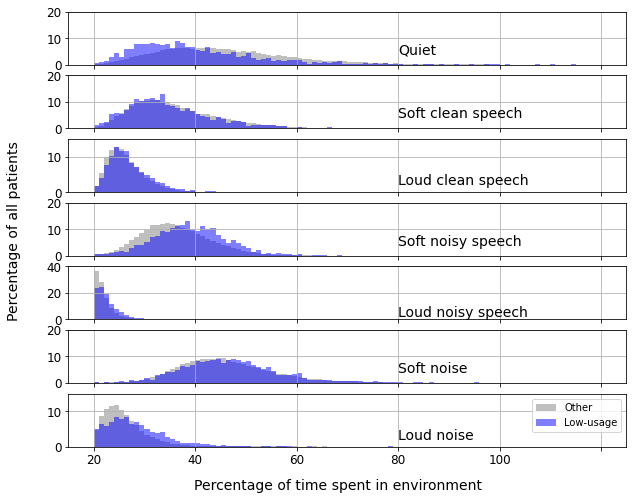

In [30]:
# Histograms
fig, ax = plt.subplots(7,1, sharex=True, figsize = (10,8))
titles = ['Quiet','Soft clean speech','Loud clean speech'\
          ,'Soft noisy speech','Loud noisy speech','Soft noise',\
         'Loud noise']
limit_y = [[0, 0.10], [0, 0.10], [0, 0.15], [0, 0.10], [0, 0.40], [0, 0.10], [0, 0.15]]
ticks_y = [[0, 10, 20],[0, 10, 20],[0, 10, 20],[0, 10, 20],[0, 20, 40],[0, 10, 20],[0, 10, 20]]

#plot all the other Hi's 
for idx in range(0,len(titles)):    
    ax[idx].hist(eval('env' + str(idx) + '_' + str(1)), 100, alpha=0.5, color = 'grey', range=(0,100), density = True, label = 'Other')
    
#plot the low-usage group
for idx in range(0,len(titles)):
    ax[idx].hist(eval('env' + str(idx) + '_' + str(0)), 100, alpha=0.5, color = 'blue', range=(0,100), density = True, label = 'Low-usage')
    ax[idx].grid(True)
    ax[idx].text(60,0.02,titles[idx], fontsize = 14)
    ax[idx].set_ylim(limit_y[idx])
    ax[idx].set_yticklabels(ticks_y[idx], fontsize = 12)
    ax[idx].set_xticklabels([0, 20, 40, 60, 80, 100], fontsize = 12)
    
fig.text(0.5, 0.05, 'Percentage of time spent in environment', ha='center', fontsize = 14)
fig.text(0.04, 0.5, 'Percentage of all patients', va='center', rotation='vertical', fontsize = 14)

plt.legend()


In [14]:
#now obtain the input level histograms
def get_input_level(df):    
    
    import pandas as pd
    
    tmp = {}
    usetime_mean = {}    
    inp0 = []
    inp1 = []
    inp2 = []
    inp3 = []
    inp4 = []
    inp5 = []
    inp6 = []
    
    his = []
    
    inp_df = []
        
    cnt = 0
    for hi_id, group in df.groupby('ADLRawData_HearingInstrumentId'):
        if (cnt%1000 == 0):
            print('HI = ',cnt)
            
        for idx in range(0,7):
            tmp[idx] = group['ADLProperties_HistogramOnInputPowerPreset1_' + str(idx)] #/ group['ADLProperties_TotalUseTime'] * 100             
            usetime_mean[idx] = tmp[idx].loc['2019-01-01':'2020-01-01'].sum() / 52

        summe = sum((usetime_mean[i] for i in range(7)))
        
        if (summe == 0):
            continue
            
        inp0.append(usetime_mean[0] / summe * 100) #(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3] + usetime_mean[4] + usetime_mean[5]) * 100)
        inp1.append(usetime_mean[1] / summe * 100)#(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3] + usetime_mean[4] + usetime_mean[5]) * 100)
        inp2.append(usetime_mean[2] / summe * 100)#(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3] + usetime_mean[4] + usetime_mean[5]) * 100)
        inp3.append(usetime_mean[3] / summe * 100)#(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3] + usetime_mean[4] + usetime_mean[5]) * 100)
        inp4.append(usetime_mean[4] / summe * 100)#(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3] + usetime_mean[4] + usetime_mean[5]) * 100)
        inp5.append(usetime_mean[5] / summe * 100)#(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3] + usetime_mean[4] + usetime_mean[5]) * 100)    
        inp6.append(usetime_mean[6] / summe * 100)                            
        
        cnt += 1
        
        his.append(hi_id)        
         
    #now generate a dataframe and export 
    inp_df = pd.DataFrame({'HI_ID':his, 'inp0':inp0, 'inp1':inp1, 'inp2':inp2, 'inp3':inp3, 'inp4':inp4,\
                           'inp5':inp5, 'inp6':inp6})    
    return (inp0, inp1, inp2, inp3, inp4, inp5, inp6, inp_df)
        

In [16]:
(inp0_0, inp1_0, inp2_0, inp3_0, inp4_0, inp5_0, inp6_0, inp_df_0) = get_input_level(low_usage_cluster)
(inp0_1, inp1_1, inp2_1, inp3_1, inp4_1, inp5_1, inp6_1, inp_df_1) = get_input_level(all_other)

HI =  0
HI =  1000
HI =  0
HI =  1000
HI =  2000
HI =  3000
HI =  4000
HI =  5000
HI =  6000
HI =  7000
HI =  8000
HI =  9000
HI =  10000
HI =  11000
HI =  12000
HI =  13000
HI =  14000
HI =  15000
HI =  16000
HI =  17000
HI =  18000
HI =  19000
HI =  20000
HI =  21000
HI =  22000
HI =  23000
HI =  24000
HI =  25000
HI =  26000
HI =  27000
HI =  28000
HI =  29000
HI =  30000
HI =  31000
HI =  32000
HI =  33000
HI =  34000
HI =  35000
HI =  36000
HI =  37000
HI =  38000
HI =  39000
HI =  40000


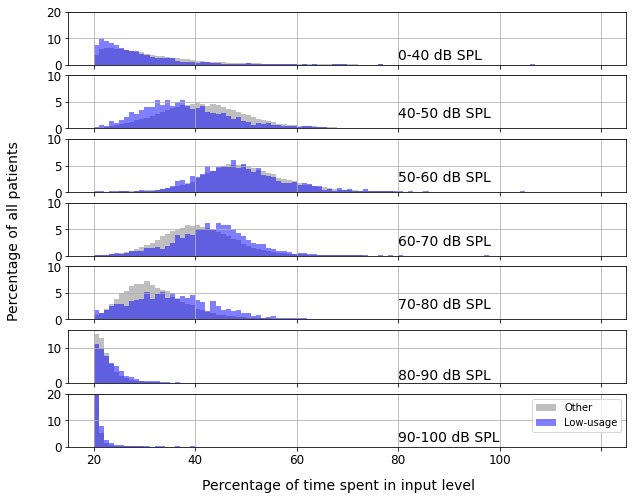

In [31]:
#now plot the input histograms
fig, ax = plt.subplots(7,1, sharex=True, figsize = (10,8))
titles = ['0-40 dB SPL','40-50 dB SPL','50-60 dB SPL'\
          ,'60-70 dB SPL','70-80 dB SPL','80-90 dB SPL','90-100 dB SPL']

limit_y = [[0, 0.2], [0, 0.10], [0, 0.10], [0, 0.10], [0, 0.10], [0, 0.3], [0, 0.2]]
ticks_y = [[0, 10, 20],[0, 5, 10],[0, 5, 10],[0, 5, 10],[0, 5, 10],[0, 10, 20, 30], [0, 10, 20]]

#plot all the other Hi's 
for idx in range(0,len(titles)):    
    ax[idx].hist(eval('inp' + str(idx) + '_' + str(1)), 100, alpha=0.5, color = 'grey', range=(0,100), density = True, label = 'Other')
    
#plot the low-usage group
for idx in range(0,len(titles)):
    ax[idx].hist(eval('inp' + str(idx) + '_' + str(0)), 100, alpha=0.5, color = 'blue', range=(0,100), density = True, label = 'Low-usage')
    ax[idx].grid(True)
    ax[idx].text(60,0.02,titles[idx], fontsize = 14)
    ax[idx].set_ylim(limit_y[idx])
    ax[idx].set_yticklabels(ticks_y[idx], fontsize = 12)
    ax[idx].set_xticklabels([0, 20, 40, 60, 80, 100], fontsize = 12)
    
fig.text(0.5, 0.05, 'Percentage of time spent in input level', ha='center', fontsize = 14)
fig.text(0.04, 0.5, 'Percentage of all patients', va='center', rotation='vertical', fontsize = 14)

plt.legend()



In [21]:
def get_bass_state(df):
    
    import pandas as pd
    
    tmp = {}
    usetime_mean = {}    
    bass0 = []
    bass1 = []
    bass2 = []
    bass3 = []
    
    his = []
    
    bass_df = pd.DataFrame()
        
    cnt = 0
    for hi_id, group in df.groupby('ADLRawData_HearingInstrumentId'):
        cnt += 1
        if (cnt%1000 == 0):
            print('HI = ',cnt)
        
        

        flag = False    
        for idx in range(0,4):
            tmp[idx] = group['ADLProperties_Bass3StateHistogram_' + str(idx)] #/ group['ADLProperties_TotalUseTime'] * 100             
            usetime_mean[idx] = tmp[idx].loc['2019-01-01':'2020-01-01'].sum() / 52  
            flag = usetime_mean[idx] < 0

                        
        if(flag == True):            
            continue                    

        summe = sum((usetime_mean[i] for i in range(4)))
        
        if (summe == 0):            
            continue           
        
                        
        bass0.append(usetime_mean[0] / summe * 100) #(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3]) * 100)
        bass1.append(usetime_mean[1] / summe * 100) #(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3]) * 100)
        bass2.append(usetime_mean[2] / summe * 100) #(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3]) * 100)
        bass3.append(usetime_mean[3] / summe * 100) #(usetime_mean[0] + usetime_mean[1] + usetime_mean[2] + usetime_mean[3]) * 100)
                            
        
        his.append(hi_id)     
                  
         
    #now generate a dataframe and export 
    bass_df = pd.DataFrame({'HI_ID':his, 'bass0':bass0, 'bass1':bass1, 'bass2':bass2, 'bass3':bass3})    
    return (bass0, bass1, bass2, bass3, bass_df)
        


In [22]:
(bass0_0, bass1_0, bass2_0, bass3_0, bass_df_0) = get_bass_state(low_usage_cluster)
(bass0_1, bass1_1, bass2_1, bass3_1, bass_df_1) = get_bass_state(all_other)

HI =  1000
HI =  1000
HI =  2000
HI =  3000
HI =  4000
HI =  5000
HI =  6000
HI =  7000
HI =  8000
HI =  9000
HI =  10000
HI =  11000
HI =  12000
HI =  13000
HI =  14000
HI =  15000
HI =  16000
HI =  17000
HI =  18000
HI =  19000
HI =  20000
HI =  21000
HI =  22000
HI =  23000
HI =  24000
HI =  25000
HI =  26000
HI =  27000
HI =  28000
HI =  29000
HI =  30000
HI =  31000
HI =  32000
HI =  33000
HI =  34000
HI =  35000
HI =  36000
HI =  37000
HI =  38000
HI =  39000
HI =  40000


Text(0.04, 0.5, 'Percentage of all patients')

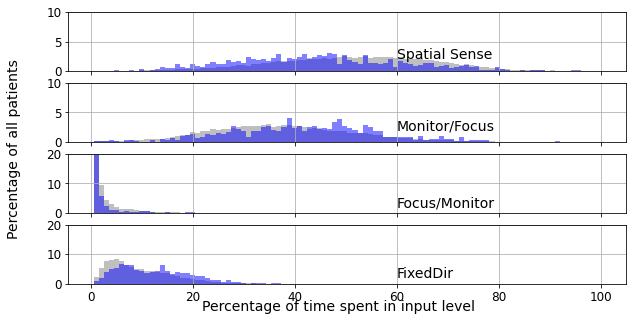

In [23]:
#now plot the bass state histograms
fig, ax = plt.subplots(4,1, sharex=True, figsize = (10,5))
titles = ['Spatial Sense','Monitor/Focus','Focus/Monitor'\
          ,'FixedDir']

limit_y = [[0, 0.1], [0, 0.10], [0, 0.2], [0, 0.20]]
ticks_y = [[0, 5, 10],[0, 5, 10],[0, 10, 20],[0, 10, 20]]

#plot all the other Hi's 
for idx in range(0,len(titles)):    
    ax[idx].hist(eval('bass' + str(idx) + '_' + str(1)), 100, alpha=0.5, color = 'grey', range=(0.5,100),\
                 density = True)
    
#plot the low-usage group
for idx in range(0,len(titles)):
    ax[idx].hist(eval('bass' + str(idx) + '_' + str(0)), 100, alpha=0.5, color = 'blue', range=(0.5,100), \
                 density = True)
    ax[idx].grid(True)
    ax[idx].text(60,0.02,titles[idx], fontsize = 14)
    ax[idx].set_ylim(limit_y[idx])
    ax[idx].set_yticklabels(ticks_y[idx], fontsize = 12)
    ax[idx].set_xticks([0, 20, 40 ,60, 80, 100])
    ax[idx].set_xticklabels([0, 20, 40, 60, 80, 100], fontsize = 12)
    
fig.text(0.5, 0.05, 'Percentage of time spent in input level', ha='center', fontsize = 14)
fig.text(0.04, 0.5, 'Percentage of all patients', va='center', rotation='vertical', fontsize = 14)



In [24]:
#saving all as pickle 
with open(base_path + 'Env_use_per_hi.pkl', 'wb') as f:
   pickle.dump(pd.concat([env_df_0, env_df_1]), f)

with open(base_path + 'Inp_level_per_hi.pkl', 'wb') as f:
   pickle.dump(pd.concat([inp_df_0, inp_df_1]), f)

with open(base_path + 'Bass_states_per_hi.pkl', 'wb') as f:
   pickle.dump(pd.concat([bass_df_0, bass_df_1]), f)

In [25]:
env_df_0.values.shape

(1778, 8)

## Now look at what the average use of the BASS modes was in 2019

In [26]:
bass_all = pd.concat([bass_df_0, bass_df_1], axis=0)

In [27]:
def draw_plot(ax, data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, alpha = 0.4)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color, alpha = 0.6) 

Text(0, 0.5, 'Percent of time')

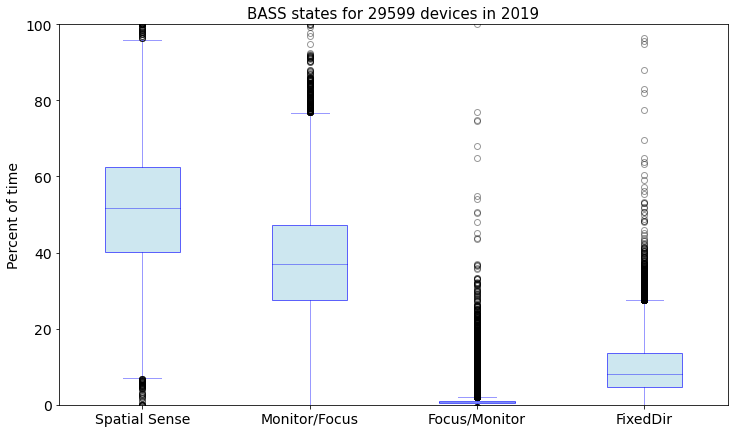

In [28]:
#plot the distributions
fig, ax = plt.subplots(figsize = (12,7))
mittel = bass_all[['bass0','bass1','bass2','bass3']].values
#std = bass_all[['bass0','bass1','bass2','bass3']].std(axis=0)

draw_plot(ax, mittel, 'blue', 'lightblue')

ax.set_ylim([0, 100])
ax.set_xticklabels(titles, fontsize = 14)
ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontsize = 14)
ax.set_title('BASS states for 29599 devices in 2019', fontsize = 15)
plt.ylabel('Percent of time', fontsize = 14)



